In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [6]:
sep_coins = cv2.imread('../DATA/pennies.jpg')

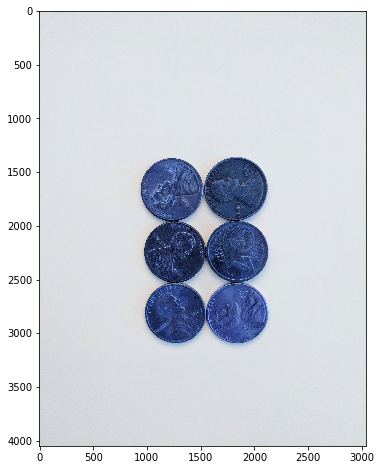

In [8]:
display(sep_coins)

In [9]:
#MEDIAN BLUR
#Gray Scale
#Binary Threshold - In order to make this clack and white
#FInd COntours

In [10]:
sep_blur=cv2.medianBlur(sep_coins,25)

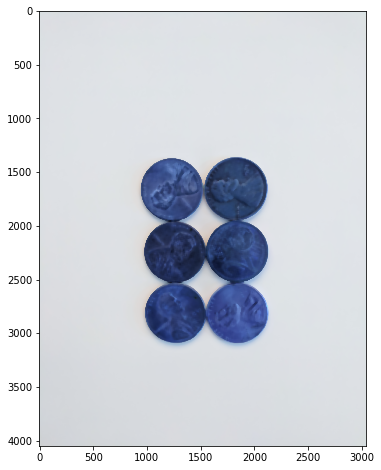

In [11]:
display(sep_blur)

In [17]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

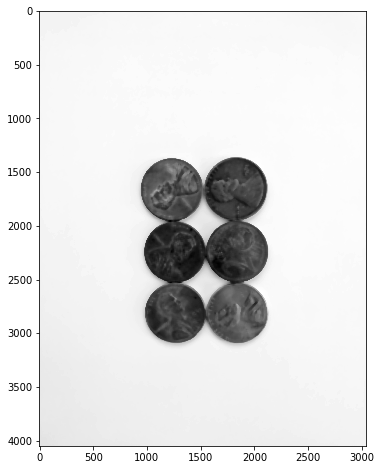

In [18]:
display(gray_sep_coins,cmap='gray')

In [19]:
ret,sep_thresh= cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

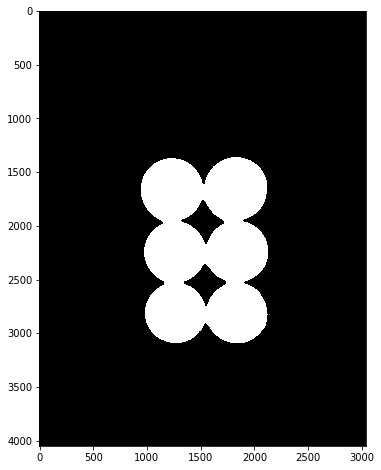

In [21]:
display(sep_thresh,cmap='gray')

In [23]:
image,contours,heirarchcy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [24]:
for i in range(len(contours)):
    
    if heirarchcy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

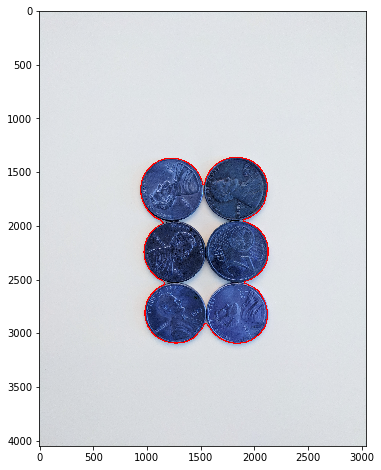

In [25]:
display(sep_coins)

In [26]:
img =cv2.imread('../DATA/pennies.jpg')

In [28]:
img = cv2.medianBlur(img,35)

In [29]:
gray =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [42]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [43]:
# USE Of OTSU method

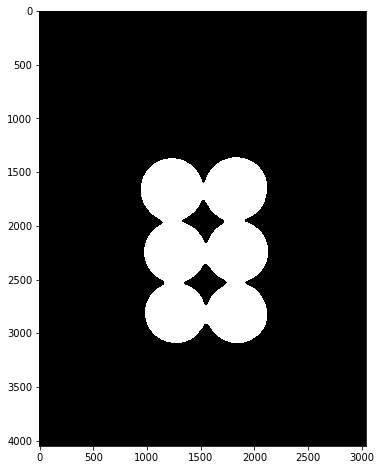

In [44]:
display(thresh,cmap='gray')

In [45]:
#NOISE REMOVAL (OPTIONAL)

In [46]:
kernel = np.ones((3,3),np.int8)

In [47]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [48]:
opening= cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

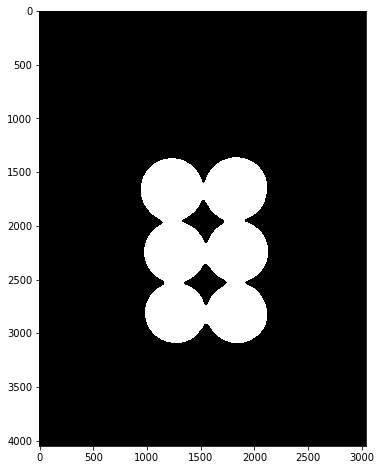

In [60]:
display(opening,cmap='gray')

In [61]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

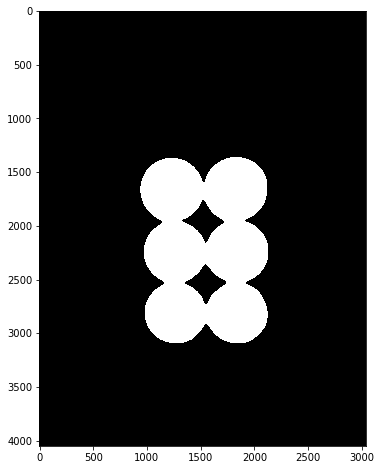

In [63]:
display(sure_bg,cmap='gray')

In [51]:
#USe distance transform

In [52]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

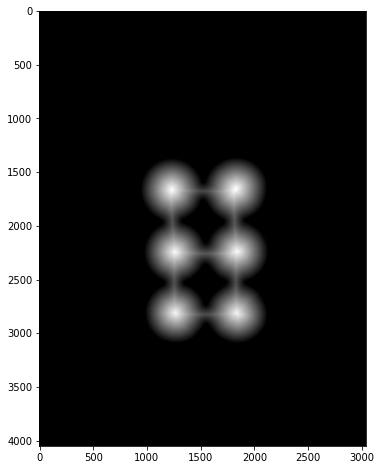

In [54]:
display(dist_transform,cmap='gray')

In [55]:
ret, sure_fg =cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

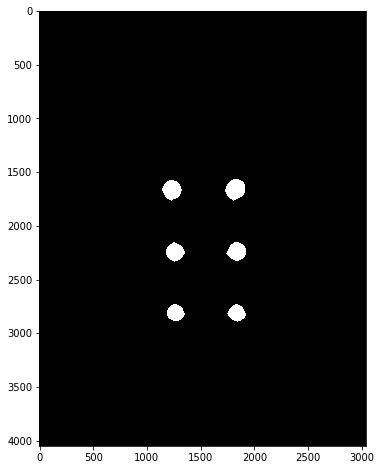

In [57]:
display(sure_fg,cmap='gray')

In [65]:
sure_fg = np.uint8(sure_fg)

In [66]:
unknown = cv2.subtract(sure_bg,sure_fg)

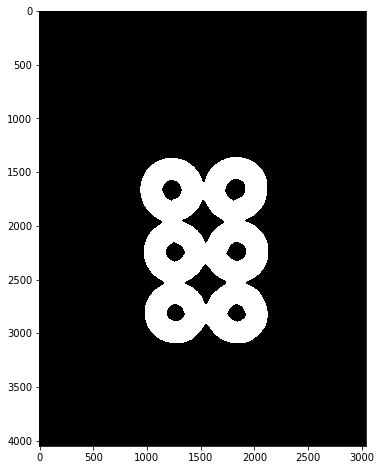

In [68]:
display(unknown,cmap='gray')

In [69]:
ret,markers = cv2.connectedComponents(sure_fg)

In [70]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [71]:
markers= markers+1

In [72]:
markers[unknown == 255] = 0

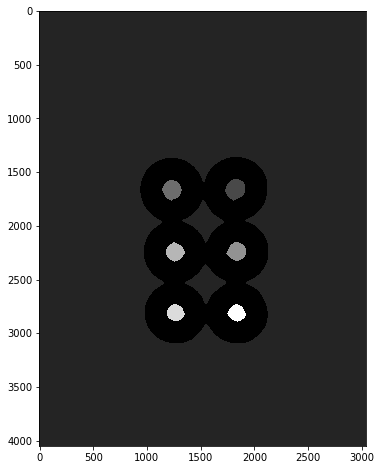

In [73]:
display(markers,cmap='gray')

In [74]:
markers = cv2.watershed(img,markers)

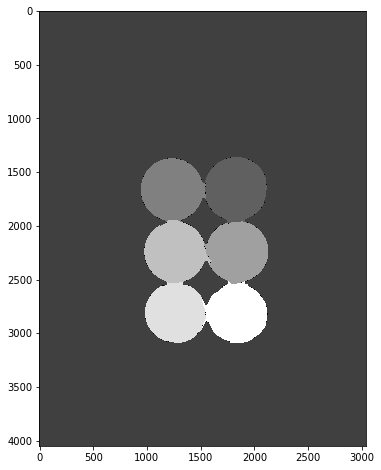

In [77]:
display(markers,cmap='gray')

In [80]:
image,contours,heirarchcy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if heirarchcy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

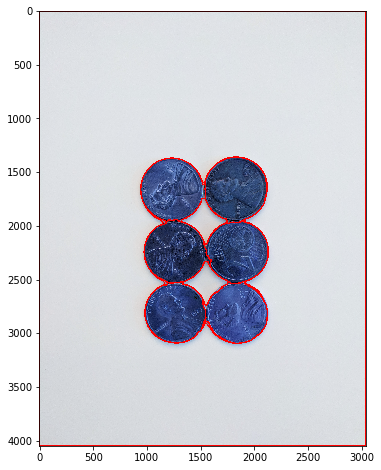

In [81]:
display(sep_coins)